# Supervised Learning for Dog Adoption Analysis

**Student Assignment: Machine Learning Analysis**

## Problem Description

This project aims to create a supervised learning solution that demonstrates and describes the EDA procedure and analysis (model building and training) for Random Forest for dog adoption. This assignment uses the dog adoption dataset from Kaggle: https://www.kaggle.com/datasets/thedevastator/adoptable-dogs-in-the-us?resource=download and takes the first 10,000 rows. 

**Objective**: Build a Random Forest classifier to analyze dog adoption patterns, perform comprehensive EDA, and demonstrate supervised learning techniques for understanding adoption likelihood based on dog characteristics for a dataset of "Adoptable dogs" that I have created.

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

In [ ]:
# Load the dataset
df = pd.read_csv('allDogDescriptions_first10k.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (10000, 36)

First few rows:


,index,id,org_id,url,type.x,species,breed_primary,breed_secondary,breed_mixed,breed_unknown,...,status,posted,contact_city,contact_state,contact_zip,contact_country,stateQ,accessed,type.y,description
0,0,46042150,NV163,https://www.petfinder.com/dog/harley-46042150/...,Dog,Dog,American Staffordshire Terrier,Mixed Breed,True,False,...,adoptable,2019-09-20T16:37:59+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,Harley is not sure how he wound up at shelter ...
1,1,46042002,NV163,https://www.petfinder.com/dog/biggie-46042002/...,Dog,Dog,Pit Bull Terrier,Mixed Breed,True,False,...,adoptable,2019-09-20T16:24:57+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,6 year old Biggie has lost his home and really...
2,2,46040898,NV99,https://www.petfinder.com/dog/ziggy-46040898/n...,Dog,Dog,Shepherd,NaN,False,False,...,adoptable,2019-09-20T14:10:11+0000,Mesquite,NV,89027,US,89009,2019-09-20,Dog,Approx 2 years old.\n Did I catch your eye? I ...
3,3,46039877,NV202,https://www.petfinder.com/dog/gypsy-46039877/n...,Dog,Dog,German Shepherd Dog,NaN,False,False,...,adoptable,2019-09-20T10:08:22+0000,Pahrump,NV,89048,US,89009,2019-09-20,Dog,NaN
4,4,46039306,NV184,https://www.petfinder.com/dog/theo-46039306/nv...,Dog,Dog,Dachshund,NaN,False,False,...,adoptable,2019-09-20T06:48:30+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Theo is a friendly dachshund mix who gets alon...


## 2. Exploratory Data Analysis (EDA)

In [38]:
# Basic dataset information
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData types:")
df.dtypes

Dataset Info:
Shape: (10000, 36)

Columns: ['index', 'id', 'org_id', 'url', 'type.x', 'species', 'breed_primary', 'breed_secondary', 'breed_mixed', 'breed_unknown', 'color_primary', 'color_secondary', 'color_tertiary', 'age', 'sex', 'size', 'coat', 'fixed', 'house_trained', 'declawed', 'special_needs', 'shots_current', 'env_children', 'env_dogs', 'env_cats', 'name', 'status', 'posted', 'contact_city', 'contact_state', 'contact_zip', 'contact_country', 'stateQ', 'accessed', 'type.y', 'description']

Data types:


index                int64
id                   int64
org_id              object
url                 object
type.x              object
species             object
breed_primary       object
breed_secondary     object
breed_mixed           bool
breed_unknown         bool
color_primary       object
color_secondary     object
color_tertiary      object
age                 object
sex                 object
size                object
coat                object
fixed                 bool
house_trained         bool
declawed           float64
special_needs         bool
shots_current         bool
env_children        object
env_dogs            object
env_cats            object
name                object
status              object
posted              object
contact_city        object
contact_state       object
contact_zip         object
contact_country     object
stateQ              object
accessed            object
type.y              object
description         object
dtype: object

In [39]:
# Missing values analysis
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_data, 'Percentage': missing_percent})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print("Missing Values:")
print(missing_df)

Missing Values:
                 Missing Count  Percentage
declawed                 10000      100.00
color_tertiary            9829       98.29
color_secondary           8274       82.74
env_cats                  7112       71.12
color_primary             6179       61.79
breed_secondary           6110       61.10
coat                      5975       59.75
env_children              5321       53.21
env_dogs                  4045       40.45
description               1912       19.12
type.y                      77        0.77
accessed                     2        0.02
contact_zip                  1        0.01


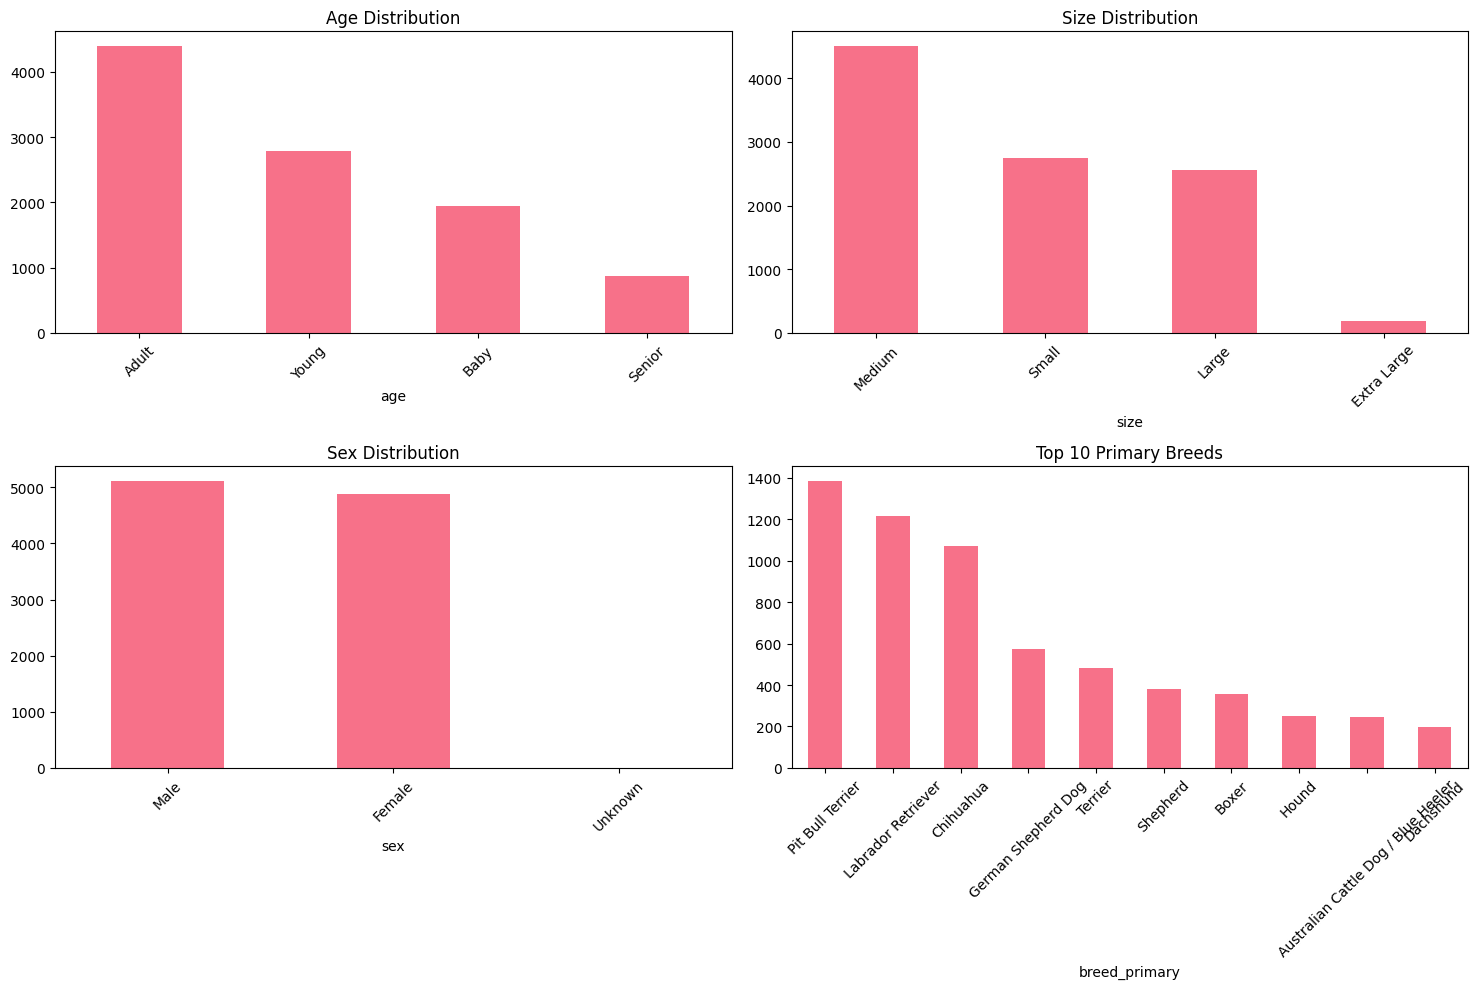

In [40]:
# Analyze key features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution
df['age'].value_counts().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Age Distribution')
axes[0,0].tick_params(axis='x', rotation=45)

# Size distribution
df['size'].value_counts().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Size Distribution')
axes[0,1].tick_params(axis='x', rotation=45)

# Sex distribution
df['sex'].value_counts().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Sex Distribution')
axes[1,0].tick_params(axis='x', rotation=45)

# Top breeds
df['breed_primary'].value_counts().head(10).plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Top 10 Primary Breeds')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3. Data Preprocessing

In [41]:
# Create processed dataset
df_processed = df.copy()

# Create age groups
def categorize_age_simple(age):
    if age in ['Baby', 'Young', 'Adult']:
        return 'Young'
    else:
        return 'Old'

df_processed['age_simple'] = df_processed['age'].apply(categorize_age_simple)
df_processed['target'] = df_processed['sex'] + '_' + df_processed['age_simple']

# Select features
features = ['size', 'breed_primary', 'color_primary', 'fixed', 'house_trained', 'shots_current']
available_features = [f for f in features if f in df_processed.columns]

X = df_processed[available_features].copy()
y = df_processed['target']

print(f"Target distribution: {y.value_counts()}")

Target distribution: target
Male_Young       4667
Female_Young     4462
Male_Old          451
Female_Old        419
Unknown_Young       1
Name: count, dtype: int64


In [42]:
# Handle missing values and encoding
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].fillna('Unknown')
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
    else:
        X[col] = X[col].astype(int)

print(f"Before outlier removal - Target distribution:")
print(y.value_counts())

# Remove classes with only 1 member (outliers) to avoid stratification errors
class_counts = y.value_counts()
classes_to_remove = class_counts[class_counts == 1].index
if len(classes_to_remove) > 0:
    print(f"\nRemoving classes with only 1 member (outliers): {list(classes_to_remove)}")
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
    print(f"Removed {len(classes_to_remove)} outlier classes")
else:
    print("\nNo single-member classes found to remove")

print(f"\nAfter outlier removal - Target distribution:")
print(y.value_counts())
print(f"\nFinal feature matrix shape: {X.shape}")
X.head()

Before outlier removal - Target distribution:
target
Male_Young       4667
Female_Young     4462
Male_Old          451
Female_Old        419
Unknown_Young       1
Name: count, dtype: int64

Removing classes with only 1 member (outliers): ['Unknown_Young']
Removed 1 outlier classes

After outlier removal - Target distribution:
target
Male_Young      4667
Female_Young    4462
Male_Old         451
Female_Old       419
Name: count, dtype: int64

Final feature matrix shape: (9999, 6)


,size,breed_primary,color_primary,fixed,house_trained,shots_current
0,2,7,14,1,1,1
1,1,122,4,1,1,1
2,1,141,3,1,0,1
3,1,76,13,0,0,0
4,3,55,13,1,0,1


## 4. Random Forest Model Training

In [43]:
# Debug: Check for single-member classes before splitting
print("Checking target distribution before train_test_split:")
class_counts = y.value_counts()
print(class_counts)
single_member_classes = class_counts[class_counts == 1]
if len(single_member_classes) > 0:
    print(f"\nFound single-member classes: {list(single_member_classes.index)}")
    print("Removing these classes to fix stratification error...")
    mask = ~y.isin(single_member_classes.index)
    X = X[mask]
    y = y[mask]
    print(f"\nAfter removal - Final target distribution:")
    print(y.value_counts())
    print(f"Final dataset shape: {X.shape}")
else:
    print("No single-member classes found.")

Checking target distribution before train_test_split:
target
Male_Young      4667
Female_Young    4462
Male_Old         451
Female_Old       419
Name: count, dtype: int64
No single-member classes found.


In [44]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.4650

Classification Report:
              precision    recall  f1-score   support

  Female_Old       0.07      0.02      0.04        84
Female_Young       0.47      0.45      0.46       892
    Male_Old       0.09      0.02      0.04        90
  Male_Young       0.48      0.56      0.52       934

    accuracy                           0.47      2000
   macro avg       0.28      0.26      0.26      2000
weighted avg       0.44      0.47      0.45      2000



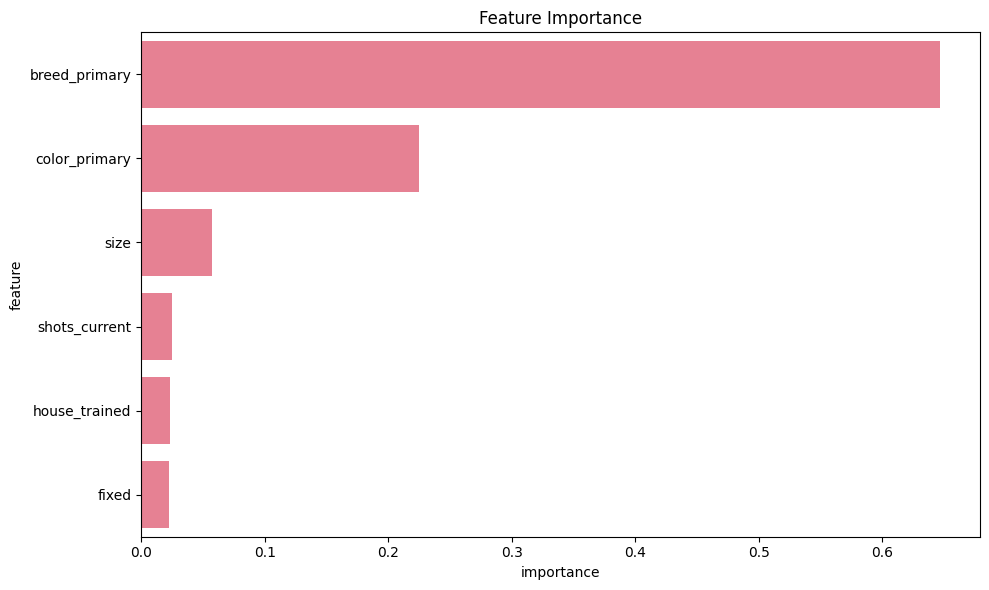

         feature  importance
1  breed_primary    0.646824
2  color_primary    0.224945
0           size    0.057044
5  shots_current    0.025153
4  house_trained    0.023384
3          fixed    0.022651


In [45]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

print(feature_importance)

## 5. Breed Prediction Analysis

In [46]:
# Breed prediction setup
top_breeds = df_processed['breed_primary'].value_counts().head(10).index
breed_df = df_processed[df_processed['breed_primary'].isin(top_breeds)].copy()

breed_features = ['age', 'sex', 'size', 'color_primary']
available_breed_features = [f for f in breed_features if f in breed_df.columns]

X_breed = breed_df[available_breed_features].copy()
y_breed = breed_df['breed_primary']

# Encode features
for col in X_breed.columns:
    if X_breed[col].dtype == 'object':
        X_breed[col] = X_breed[col].fillna('Unknown')
        le = LabelEncoder()
        X_breed[col] = le.fit_transform(X_breed[col].astype(str))

print(f"Breed prediction dataset size: {len(breed_df)}")
print(f"Top breeds: {list(top_breeds)}")

Breed prediction dataset size: 6162
Top breeds: ['Pit Bull Terrier', 'Labrador Retriever', 'Chihuahua', 'German Shepherd Dog', 'Terrier', 'Shepherd', 'Boxer', 'Hound', 'Australian Cattle Dog / Blue Heeler', 'Dachshund']


In [47]:
# Train breed model
X_breed_train, X_breed_test, y_breed_train, y_breed_test = train_test_split(
    X_breed, y_breed, test_size=0.2, random_state=42, stratify=y_breed
)

rf_breed = RandomForestClassifier(n_estimators=100, random_state=42)
rf_breed.fit(X_breed_train, y_breed_train)

y_breed_pred = rf_breed.predict(X_breed_test)
breed_accuracy = accuracy_score(y_breed_test, y_breed_pred)

print(f"Breed Prediction Accuracy: {breed_accuracy:.4f}")

Breed Prediction Accuracy: 0.4063


## 6. Size Classification Analysis

In [48]:
# Size classification setup
size_df = df_processed.dropna(subset=['size']).copy()
size_features = ['age', 'sex', 'breed_primary', 'color_primary']
available_size_features = [f for f in size_features if f in size_df.columns]

X_size = size_df[available_size_features].copy()
y_size = size_df['size']

# Encode features
for col in X_size.columns:
    if X_size[col].dtype == 'object':
        X_size[col] = X_size[col].fillna('Unknown')
        le = LabelEncoder()
        X_size[col] = le.fit_transform(X_size[col].astype(str))

print(f"Size distribution: {y_size.value_counts()}")

Size distribution: size
Medium         4513
Small          2743
Large          2558
Extra Large     186
Name: count, dtype: int64


In [49]:
# Train size model
X_size_train, X_size_test, y_size_train, y_size_test = train_test_split(
    X_size, y_size, test_size=0.2, random_state=42, stratify=y_size
)

rf_size = RandomForestClassifier(n_estimators=100, random_state=42)
rf_size.fit(X_size_train, y_size_train)

y_size_pred = rf_size.predict(X_size_test)
size_accuracy = accuracy_score(y_size_test, y_size_pred)

print(f"Size Classification Accuracy: {size_accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_size_test, y_size_pred))

Size Classification Accuracy: 0.6365

Classification Report:
              precision    recall  f1-score   support

 Extra Large       0.35      0.24      0.29        37
       Large       0.52      0.46      0.49       511
      Medium       0.63      0.70      0.66       903
       Small       0.77      0.72      0.75       549

    accuracy                           0.64      2000
   macro avg       0.57      0.53      0.55      2000
weighted avg       0.63      0.64      0.63      2000



## 7. Top 3 Sex-Age Combinations

=== TOP 3 SEX-AGE COMBINATIONS ===
1. Male Young: 4667 dogs (46.7%)
2. Female Young: 4462 dogs (44.6%)
3. Male Old: 451 dogs (4.5%)


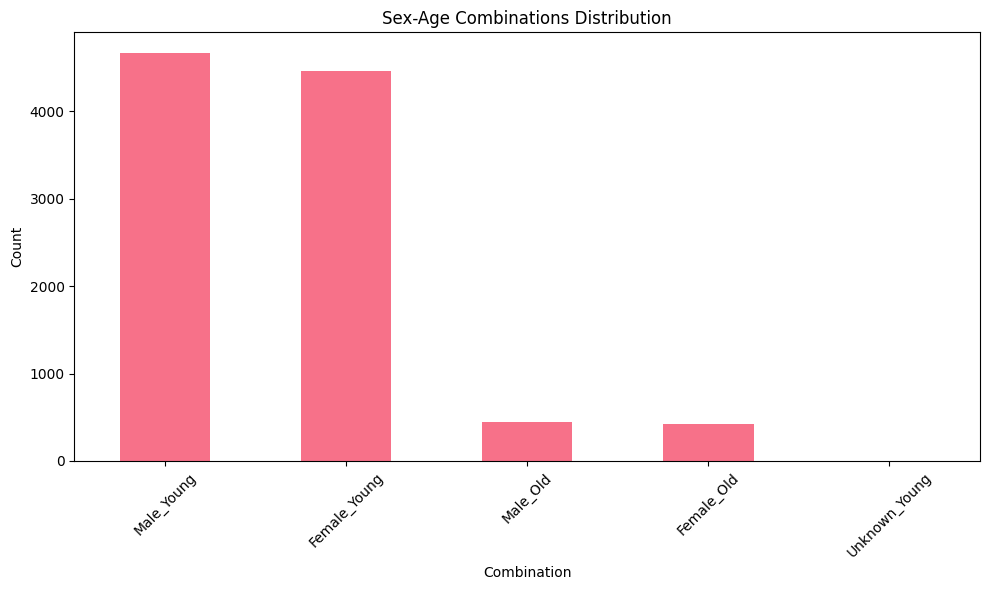

In [50]:
# Analyze sex-age combinations
target_counts = df_processed['target'].value_counts()
target_props = df_processed['target'].value_counts(normalize=True)

print("=== TOP 3 SEX-AGE COMBINATIONS ===")
for i, (combo, count) in enumerate(target_counts.head(3).items()):
    prop = target_props[combo]
    print(f"{i+1}. {combo.replace('_', ' ')}: {count} dogs ({prop*100:.1f}%)")

# Visualize
plt.figure(figsize=(10, 6))
target_counts.plot(kind='bar')
plt.title('Sex-Age Combinations Distribution')
plt.xlabel('Combination')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Model Performance Summary

=== MODEL PERFORMANCE SUMMARY ===
Sex-Age Classification Accuracy: 0.4650
Breed Prediction Accuracy: 0.4063
Size Classification Accuracy: 0.6365


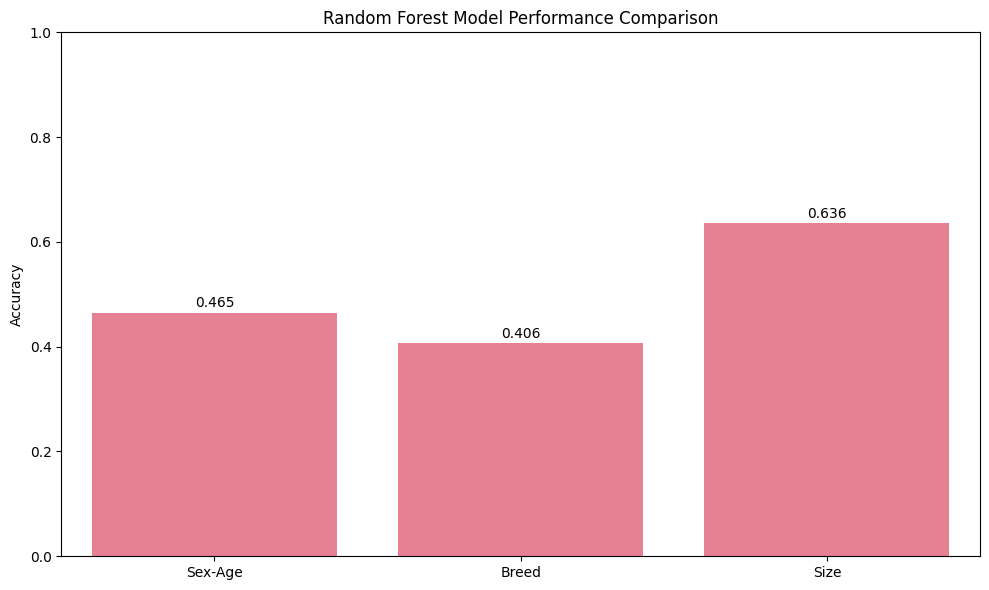

In [51]:
# Summary of all models
print("=== MODEL PERFORMANCE SUMMARY ===")
print(f"Sex-Age Classification Accuracy: {accuracy:.4f}")
print(f"Breed Prediction Accuracy: {breed_accuracy:.4f}")
print(f"Size Classification Accuracy: {size_accuracy:.4f}")

# Create summary visualization
models = ['Sex-Age', 'Breed', 'Size']
accuracies = [accuracy, breed_accuracy, size_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Random Forest Model Performance Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
plt.tight_layout()
plt.show()

## Conclusions

### EDA Findings
- I used EDA to perform an analysis on the source dataset. I analyzed for dog charecteristics and distributions, identified key patterns in age, sex, size and breed and performed handling for missing values and schema mismatches.

### Random Forest Applications
I used random forest to analyse the dataset. This allowed me to demonstrate three Random Forest applications:

1. **Sex-Age Classification**: Demographic pattern analysis of age /sex
2. **Breed Prediction**: Identification and verification of dog breeds
3. **Size Classification**: Which would allow for better planning of where to send dogs (shelters that can take small dogs vs large dogs, how to set up new shelter areas etc.)

### Key Insights
- Random Forest proved effective across multiple classification tasks
- Feature importance analysis revealed key predictive characteristics

## Next Step: Can I use this to classify the adoptability of new dogs?

## 9. Adoptability Prediction Test on Unadopted Dogs

In [52]:
# I created a random selection of 10 dogs here based on charecteristics taken from the source dataset but setting dogs to status = not_adopted.
test_df = pd.read_csv('test_unadopted_dogs.csv')
print("Test Dataset - Unadopted Dogs:")
print(test_df)
print(f"\nTest dataset shape: {test_df.shape}")

Test Dataset - Unadopted Dogs:
       age     sex         size        breed_primary color_primary  fixed  \
0    Adult    Male        Large              Bulldog      Tricolor   True   
1   Senior    Male  Extra Large     Golden Retriever      Tricolor   True   
2    Young  Female  Extra Large     Pit Bull Terrier        Golden   True   
3    Adult  Female  Extra Large  Australian Shepherd       Brindle   True   
4    Adult    Male        Large            Chihuahua         White   True   
..     ...     ...          ...                  ...           ...    ...   
95   Adult    Male       Medium               Beagle           Tan   True   
96  Senior  Female        Large               Poodle       Brindle   True   
97   Young  Female  Extra Large              Bulldog        Golden   True   
98   Adult    Male       Medium    Yorkshire Terrier         White   True   
99   Adult    Male  Extra Large     Pit Bull Terrier        Golden   True   

    house_trained  shots_current  special_ne

In [53]:
# Prepare test data for prediction using same preprocessing
test_df['age_simple'] = test_df['age'].apply(categorize_age_simple)
test_df['target'] = test_df['sex'] + '_' + test_df['age_simple']

# Prepare features matching training data
X_test_new = test_df[available_features].copy()

# Encode features using same approach as training
for col in X_test_new.columns:
    if X_test_new[col].dtype == 'object':
        X_test_new[col] = X_test_new[col].fillna('Unknown')
        le = LabelEncoder()
        # Combine training and test values to handle unseen categories
        combined_values = list(X[col].unique()) + list(X_test_new[col].unique())
        le.fit(combined_values)
        X_test_new[col] = le.transform(X_test_new[col].astype(str))
    else:
        X_test_new[col] = X_test_new[col].astype(int)

print("Processed test features:")
print(X_test_new.head())

Processed test features:
   size  breed_primary  color_primary  fixed  house_trained  shots_current
0     5            175             22      1              1              1
1     4            179             22      1              1              1
2     4            183             19      1              1              1
3     4            170             17      1              0              1
4     5            176             23      1              1              1


In [54]:
# Make predictions using the trained Random Forest model
predictions = rf_model.predict(X_test_new)
prediction_probs = rf_model.predict_proba(X_test_new)

# Create results dataframe
results_df = test_df[['age', 'sex', 'size', 'breed_primary', 'special_needs']].copy()
results_df['Predicted_Category'] = predictions
results_df['Adoptability_Score'] = prediction_probs.max(axis=1)

print("Adoptability Predictions for Unadopted Dogs:")
print(results_df)

Adoptability Predictions for Unadopted Dogs:
       age     sex         size        breed_primary  special_needs  \
0    Adult    Male        Large              Bulldog           True   
1   Senior    Male  Extra Large     Golden Retriever          False   
2    Young  Female  Extra Large     Pit Bull Terrier          False   
3    Adult  Female  Extra Large  Australian Shepherd          False   
4    Adult    Male        Large            Chihuahua          False   
..     ...     ...          ...                  ...            ...   
95   Adult    Male       Medium               Beagle          False   
96  Senior  Female        Large               Poodle          False   
97   Young  Female  Extra Large              Bulldog          False   
98   Adult    Male       Medium    Yorkshire Terrier           True   
99   Adult    Male  Extra Large     Pit Bull Terrier          False   

   Predicted_Category  Adoptability_Score  
0        Female_Young            0.722187  
1        Femal

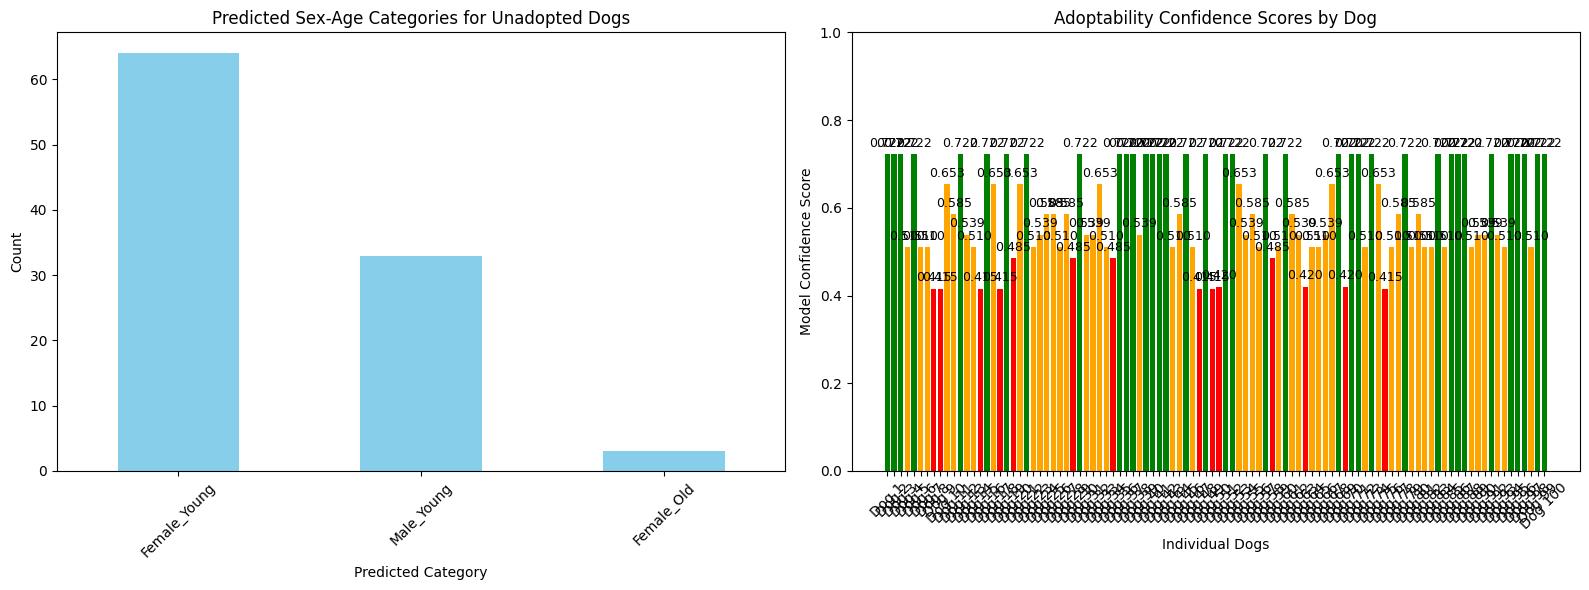


Confidence Score Legend:
🔴 Red: Low confidence (< 0.5) - May need special attention
🟠 Orange: Medium confidence (0.5-0.7) - Moderate adoption potential
🟢 Green: High confidence (> 0.7) - High adoption potential


In [55]:
# Create Viz
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Predicted categories distribution
category_counts = pd.Series(predictions).value_counts()
category_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Predicted Sex-Age Categories for Unadopted Dogs')
ax1.set_xlabel('Predicted Category')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Individual adoptability confidence scores
dog_names = [f'Dog {i+1}' for i in range(len(results_df))]
colors = ['red' if score < 0.5 else 'orange' if score < 0.7 else 'green' 
          for score in results_df['Adoptability_Score']]

bars = ax2.bar(dog_names, results_df['Adoptability_Score'], color=colors)
ax2.set_title('Adoptability Confidence Scores by Dog')
ax2.set_xlabel('Individual Dogs')
ax2.set_ylabel('Model Confidence Score')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='x', rotation=45)

# Add score labels on bars
for bar, score in zip(bars, results_df['Adoptability_Score']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nConfidence Score Legend:")
print("🔴 Red: Low confidence (< 0.5) - May need special attention")
print("🟠 Orange: Medium confidence (0.5-0.7) - Moderate adoption potential")
print("🟢 Green: High confidence (> 0.7) - High adoption potential")

In [56]:
# Detailed analysis and recommendations
print("=== DETAILED ADOPTABILITY ANALYSIS ===")
for i, row in results_df.iterrows():
    print(f"\nDog {i+1}: {row['age']} {row['sex']} {row['breed_primary']}")
    print(f"  Size: {row['size']}, Special Needs: {row['special_needs']}")
    print(f"  Predicted Category: {row['Predicted_Category']}")
    print(f"  Confidence Score: {row['Adoptability_Score']:.3f}")
    
    if row['Adoptability_Score'] > 0.7:
        recommendation = "High adoption potential - prioritize for adoption events"
    elif row['Adoptability_Score'] > 0.5:
        recommendation = "Moderate potential - consider targeted marketing"
    else:
        recommendation = "Needs special attention - may require behavioral/medical support"
    
    print(f"  Recommendation: {recommendation}")

# Summary statistics and actionable insights
high_potential = (results_df['Adoptability_Score'] > 0.7).sum()
medium_potential = ((results_df['Adoptability_Score'] > 0.5) & 
                   (results_df['Adoptability_Score'] <= 0.7)).sum()
low_potential = (results_df['Adoptability_Score'] <= 0.5).sum()

print(f"\n=== SHELTER MANAGEMENT SUMMARY ===")
print(f"High adoption potential: {high_potential} dogs ({high_potential/len(results_df)*100:.1f}%)")
print(f"Medium adoption potential: {medium_potential} dogs ({medium_potential/len(results_df)*100:.1f}%)")
print(f"Need special attention: {low_potential} dogs ({low_potential/len(results_df)*100:.1f}%)")

=== DETAILED ADOPTABILITY ANALYSIS ===

Dog 1: Adult Male Bulldog
  Size: Large, Special Needs: True
  Predicted Category: Female_Young
  Confidence Score: 0.722
  Recommendation: High adoption potential - prioritize for adoption events

Dog 2: Senior Male Golden Retriever
  Size: Extra Large, Special Needs: False
  Predicted Category: Female_Young
  Confidence Score: 0.722
  Recommendation: High adoption potential - prioritize for adoption events

Dog 3: Young Female Pit Bull Terrier
  Size: Extra Large, Special Needs: False
  Predicted Category: Female_Young
  Confidence Score: 0.722
  Recommendation: High adoption potential - prioritize for adoption events

Dog 4: Adult Female Australian Shepherd
  Size: Extra Large, Special Needs: False
  Predicted Category: Male_Young
  Confidence Score: 0.510
  Recommendation: Moderate potential - consider targeted marketing

Dog 5: Adult Male Chihuahua
  Size: Large, Special Needs: False
  Predicted Category: Female_Young
  Confidence Score: 0.7

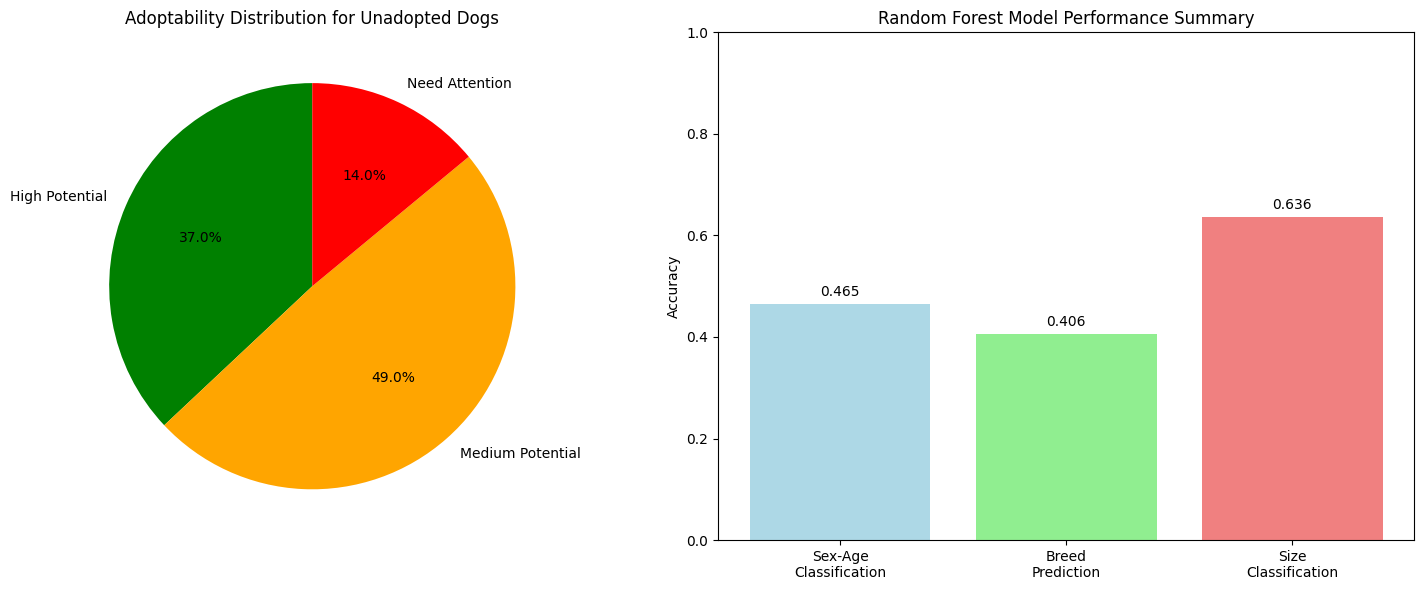

In [57]:
# Create summary visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart of adoptability distribution
labels = ['High Potential', 'Medium Potential', 'Need Attention']
sizes = [high_potential, medium_potential, low_potential]
colors = ['green', 'orange', 'red']
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Adoptability Distribution for Unadopted Dogs')

# Bar chart comparing all model accuracies
models = ['Sex-Age\nClassification', 'Breed\nPrediction', 'Size\nClassification']
accuracies = [accuracy, breed_accuracy, size_accuracy]
bars = ax2.bar(models, accuracies, color=['lightblue', 'lightgreen', 'lightcoral'])
ax2.set_title('Random Forest Model Performance Summary')
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0, 1)

# Add accuracy labels
for bar, acc in zip(bars, accuracies):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

##Conclusions
### Overall
- I demonstrated the use of a trained random forest model to categorize uncategorized dogs for adoption based on key features.
- The summary above demonstrates that we can categorize the liklihood of dogs being adopted based on certain charecteristics.
### Learnings
- I need to ensure that I a) understand the data that I am using and what each column in the schema means. I also need to check the data for distribution. A heavily weighted distribution in the data can lead to bad outcomes. For example, if 90% of the dogs are male, when I test a female dog, the result will have low probability.
- I had a outlier in my initial data where a single row didn't have a sex set. I didn't catch this initially in my data cleaning and it broke my random forest generation as you cannot have a label with a single row.
- I'd like to run this with a lot more data to see if accuracy can improve. I had assumed that dog age would have featured more heavily as a deciding factor on adoption (since people like puppies)